In [1]:
import numpy as np
import pandas as pd
import math
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns

In [2]:
data1 = pd.read_csv('los_angeles-taz-2017-1-All-MonthlyAggregate.csv',sep=',')
data2 = pd.read_csv('los_angeles-taz-2017-2-All-MonthlyAggregate.csv',sep=',')
data3 = pd.read_csv('los_angeles-taz-2017-3-All-MonthlyAggregate.csv',sep=',')
data4 = pd.read_csv('los_angeles-taz-2017-4-All-MonthlyAggregate.csv',sep=',')
data5 = pd.read_csv('los_angeles-taz-2018-1-All-MonthlyAggregate.csv',sep=',')

In [3]:
data = pd.concat([data1,data2,data3,data4])

In [4]:
def draw_top(n,frame,type):
    x = range(n)
    plt.bar(x,frame.head(n=show),width=0.5)
    plt.xticks(x,frame.index,fontsize=8)
    plt.ylabel('Count',fontsize=12)
    
    if type==0:
        plt.xlabel('sourceid',fontsize=12)
    else:
        plt.xlabel('dstid',fontsize=12)

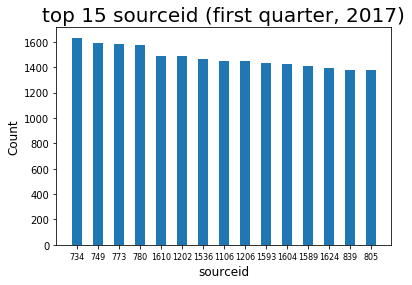

In [5]:
sid = data1.groupby(by='sourceid')['sourceid'].count().sort_values(ascending=False)
show = 15

draw_top(show,sid,0)
plt.title('top 15 sourceid (first quarter, 2017)',fontsize=20)
plt.show()

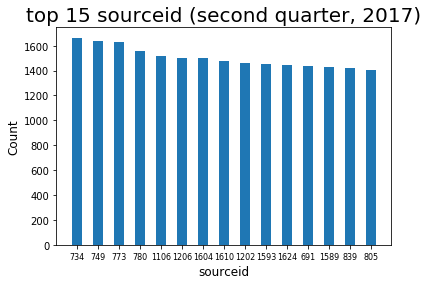

In [6]:
sid = data2.groupby(by='sourceid')['sourceid'].count().sort_values(ascending=False)
show = 15

draw_top(show,sid,0)
plt.title('top 15 sourceid (second quarter, 2017)',fontsize=20)
plt.show()

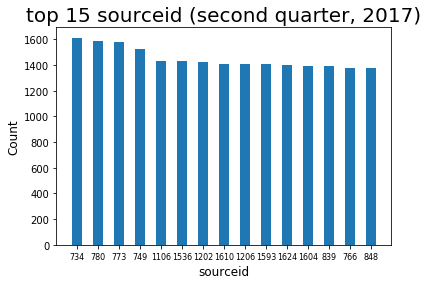

In [30]:
sid = data3.groupby(by='sourceid')['sourceid'].count().sort_values(ascending=False)
show = 15

draw_top(show,sid,0)
plt.title('top 15 sourceid (second quarter, 2017)',fontsize=20)
plt.show()

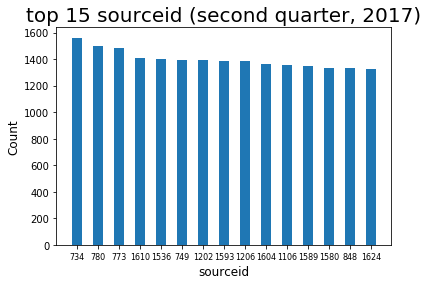

In [31]:
sid = data4.groupby(by='sourceid')['sourceid'].count().sort_values(ascending=False)
show = 15

draw_top(show,sid,0)
plt.title('top 15 sourceid (second quarter, 2017)',fontsize=20)
plt.show()

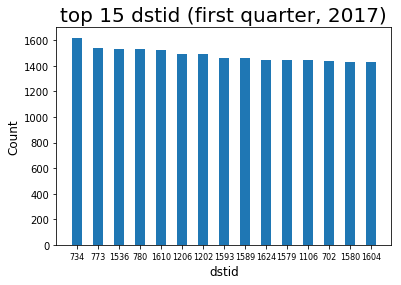

In [7]:
did = data1.groupby(by='dstid')['dstid'].count().sort_values(ascending=False)
show = 15

draw_top(show,did,1)
plt.title('top 15 dstid (first quarter, 2017)',fontsize=20)
plt.show()

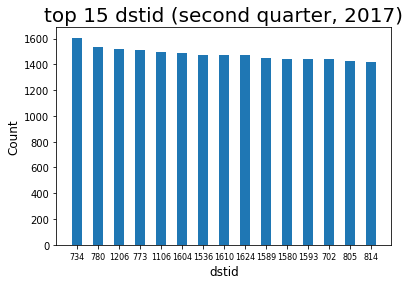

In [8]:
did = data2.groupby(by='dstid')['dstid'].count().sort_values(ascending=False)
show = 15

draw_top(show,did,1)
plt.title('top 15 dstid (second quarter, 2017)',fontsize=20)
plt.show()

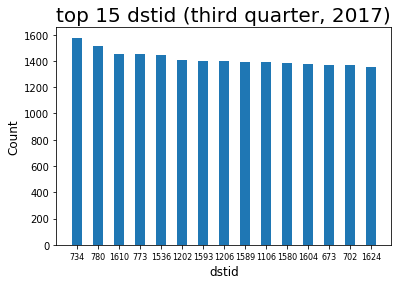

In [9]:
did = data3.groupby(by='dstid')['dstid'].count().sort_values(ascending=False)
show = 15

draw_top(show,did,1)
plt.title('top 15 dstid (third quarter, 2017)',fontsize=20)
plt.show()

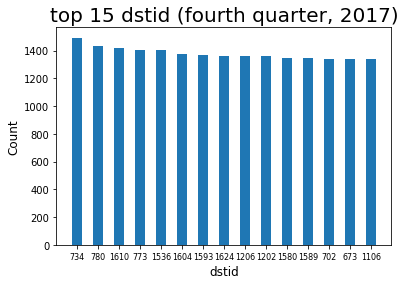

In [10]:
did = data4.groupby(by='dstid')['dstid'].count().sort_values(ascending=False)
show = 15

draw_top(show,did,1)
plt.title('top 15 dstid (fourth quarter, 2017)',fontsize=20)
plt.show()

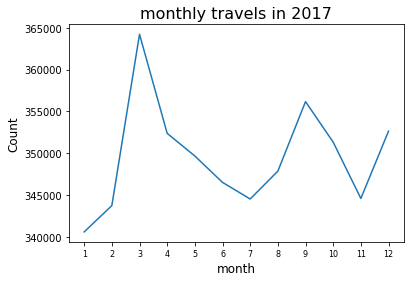

In [11]:
travels = data.groupby(by='month')['month'].count()
x = [i+1 for i in range(12)]
plt.plot(x,travels)
plt.xticks(x,x,fontsize=8)
plt.xlabel('month',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('monthly travels in 2017',fontsize=16)
plt.show()

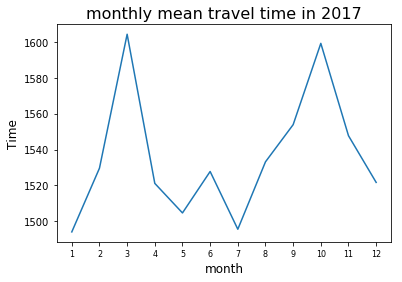

In [12]:
time = []
x = [i+1 for i in range(12)]
for i in x:
    d = data[data.month==i]
    time.append(d['mean_travel_time'].mean())    
plt.plot(x,time)
plt.xticks(x,x,fontsize=8)
plt.xlabel('month',fontsize=12)
plt.ylabel('Time',fontsize=12)
plt.title('monthly mean travel time in 2017',fontsize=16)
plt.show()

In [13]:
def plot_travel(id,type):
    if type==0:
        d = data[data.sourceid==id]
        plt.title('monthly travels from '+str(id),fontsize=16)
    else:
        d = data[data.dstid==id]
        plt.title('monthly travels to '+str(id),fontsize=16)
        
    d = d.groupby('month')['month'].count()
    x = [i+1 for i in range(12)]
    plt.plot(x,d)
    plt.xticks(x,x,fontsize=8)
    plt.xlabel('month',fontsize=12)
    plt.ylabel('Count',fontsize=12)    
    plt.show()

In [14]:
def plot_time(id,type):
    if type==0:
        d = data[data.sourceid==id]
        plt.title('monthly mean travel time from '+str(id),fontsize=16)
    else:
        d = data[data.dstid==id]
        plt.title('monthly mean travel time to '+str(id),fontsize=16)
        
    time = []
    x = [i+1 for i in range(12)]
    for i in x:
        dm = d[d.month==i]
        time.append(dm['mean_travel_time'].mean())
    plt.plot(x,time)
    plt.xticks(x,x,fontsize=8)
    plt.xlabel('month',fontsize=12)
    plt.ylabel('Time',fontsize=12)
    plt.show()

In [15]:
def plot_time_hist(id,month,type):
    d = data[data.month==month]
    if type==0:
        d = d[d.sourceid==id]
        plt.title('travel time histogram from '+str(id),fontsize=16)
    else:
        d = d[d.dstid==id]
        plt.title('travel time histogram from '+str(id),fontsize=16)
        
    min = d['mean_travel_time'].min()
    max = d['mean_travel_time'].max()
    n_bins = 20
    #plt.xlim((min-20,max+20))
    plt.xlim((0,5000))
    n,bins,patches = plt.hist(d['mean_travel_time'],n_bins,density=1,color='b',alpha=0.1)
    plt.xlabel('Time',fontsize=12)
    plt.ylabel('Frequency',fontsize=12)
    
    mu = d['mean_travel_time'].mean()
    sigma = d['mean_travel_time'].std()
    y = scipy.stats.norm.pdf(bins,mu,sigma)
    plt.plot(bins,y,'r--')
        
    sns.distplot(d['mean_travel_time'],color='b',bins=n_bins)
    plt.show()

In [16]:
def plot_time_std(id,type):
    if type==0:
        d = data[data.sourceid==id]
        plt.title('monthly mean travel time deviation from '+str(id),fontsize=16)
    else:
        d = data[data.dstid==id]
        plt.title('monthly mean travel time deviation to '+str(id),fontsize=16)
        
    time = []
    x = [i+1 for i in range(12)]
    for i in x:
        dm = d[d.month==i]
        time.append(dm['mean_travel_time'].std())
    plt.plot(x,time)
    plt.xticks(x,x,fontsize=8)
    plt.xlabel('month',fontsize=12)
    plt.ylabel('Deviation',fontsize=12)
    plt.ylim((500,1000))
    plt.yticks([500,750,1000],['small','medium','large'])
    plt.grid(color='r',linestyle='-',linewidth=1,axis='y')
    plt.show()

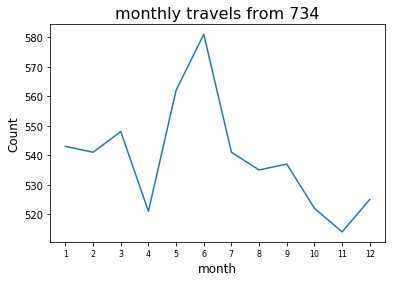

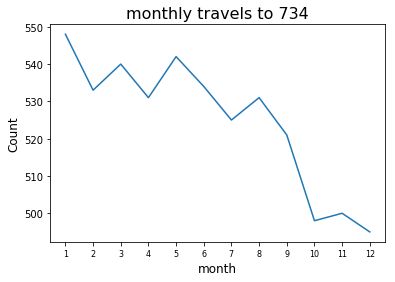

In [17]:
index = 734
plot_travel(index,0)
plot_travel(index,1)

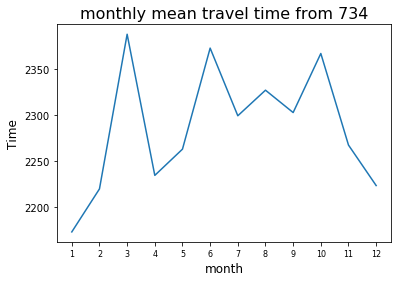

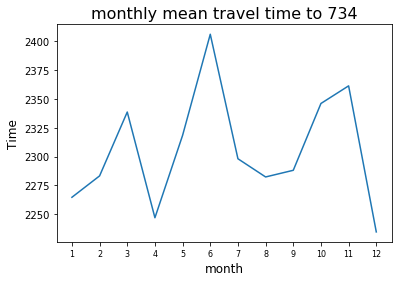

In [18]:
index = 734
plot_time(index,0)
plot_time(index,1)

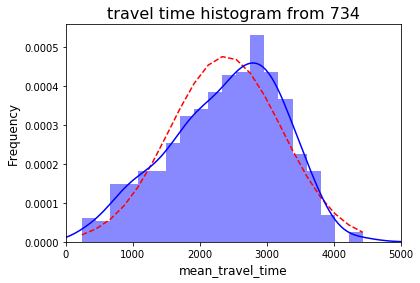

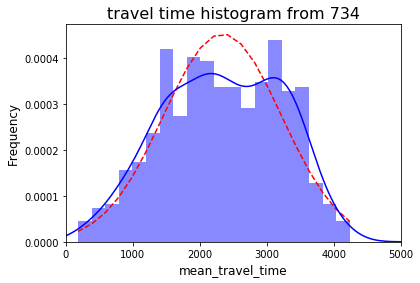

In [19]:
index = 734
plot_time_hist(index,3,0)
plot_time_hist(index,3,1)

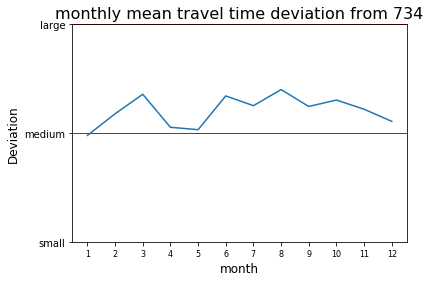

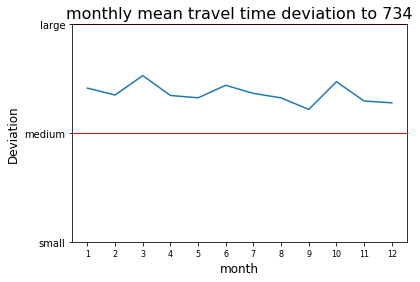

In [20]:
index = 734
plot_time_std(index,0)
plot_time_std(index,1)

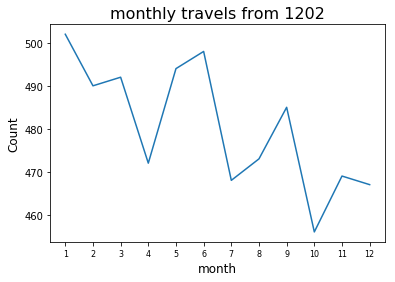

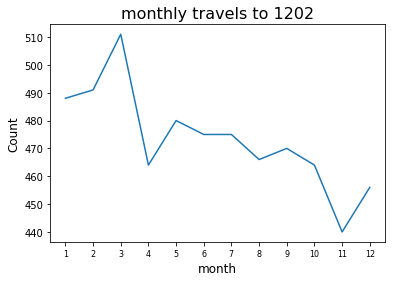

In [21]:
index = 1202
plot_travel(index,0)
plot_travel(index,1)

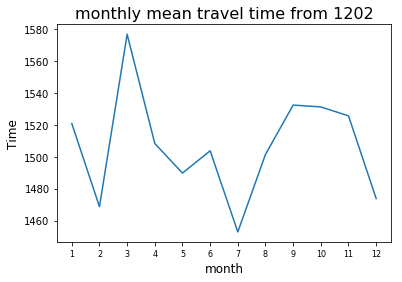

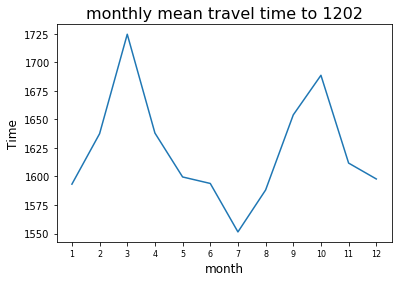

In [22]:
index = 1202
plot_time(index,0)
plot_time(index,1)

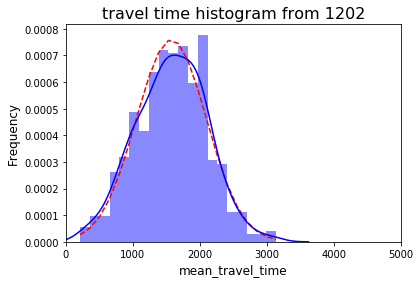

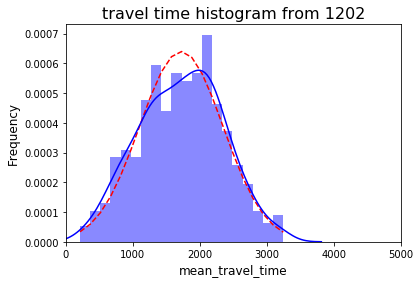

In [23]:
index = 1202
plot_time_hist(index,3,0)
plot_time_hist(index,3,1)

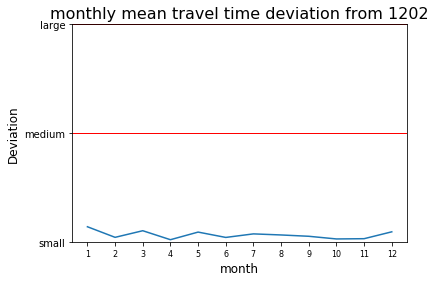

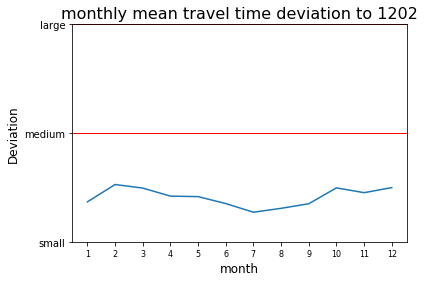

In [24]:
index = 1202
plot_time_std(index,0)
plot_time_std(index,1)

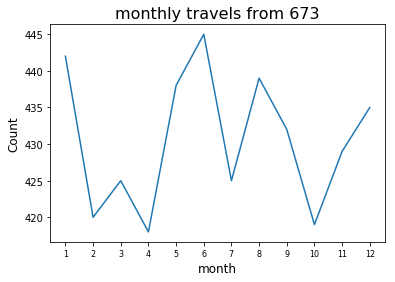

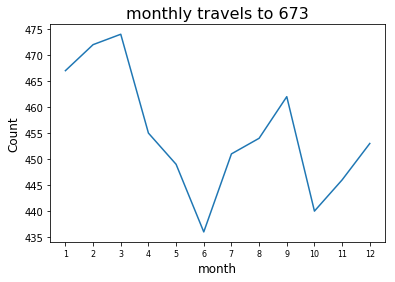

In [25]:
index = 673
plot_travel(index,0)
plot_travel(index,1)

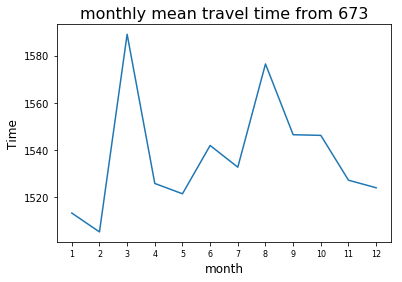

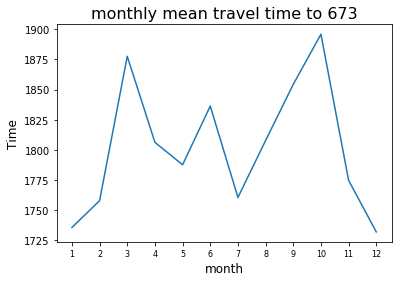

In [26]:
index = 673
plot_time(index,0)
plot_time(index,1)

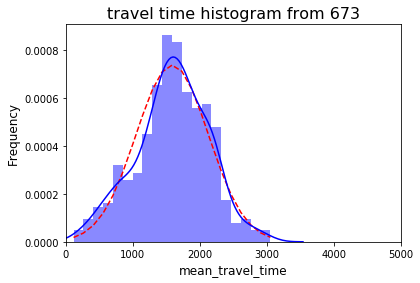

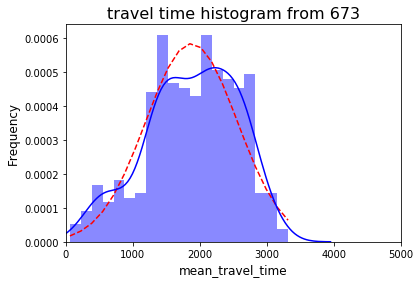

In [27]:
index = 673
plot_time_hist(index,3,0)
plot_time_hist(index,3,1)

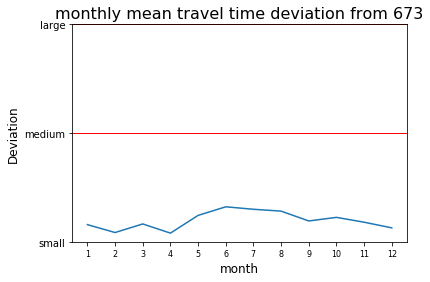

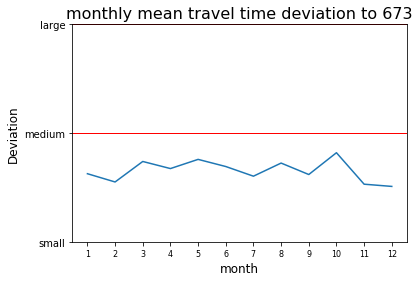

In [28]:
index = 673
plot_time_std(index,0)
plot_time_std(index,1)